#**Startup task: Train and test on winequality dataset**

# Importing Data and Libraries 

Importing important libraries:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run wine.py

Importing data:

In [0]:
wine = pd.read_csv('winequality.csv')
X = wine.copy()
y = X.pop('recommend')

# Exploratory Data Analysis

Let's take a quick look at the dataset:

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [6]:
wine.shape

(4898, 13)

Let's check if there are any null values in the dataset

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

There are no null values in the dataset.

Now we will see the datatypes of all the features:

In [9]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
recommend                  bool
dtype: object

All features are numeric, do not require any modification or encoding.


The column to be predicted is 'recommend'

In [10]:
wine.recommend.value_counts()

False    3838
True     1060
Name: recommend, dtype: int64

The data is a bit skewed as number of False cases is more than thrice than True cases.

Let's take a look at the descriptive summary statistics of all the features:

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We can see that some features like free sulfur dioxide and total sulphur dioxide are on a much larger scale than the rest.

# Plotting Distributions

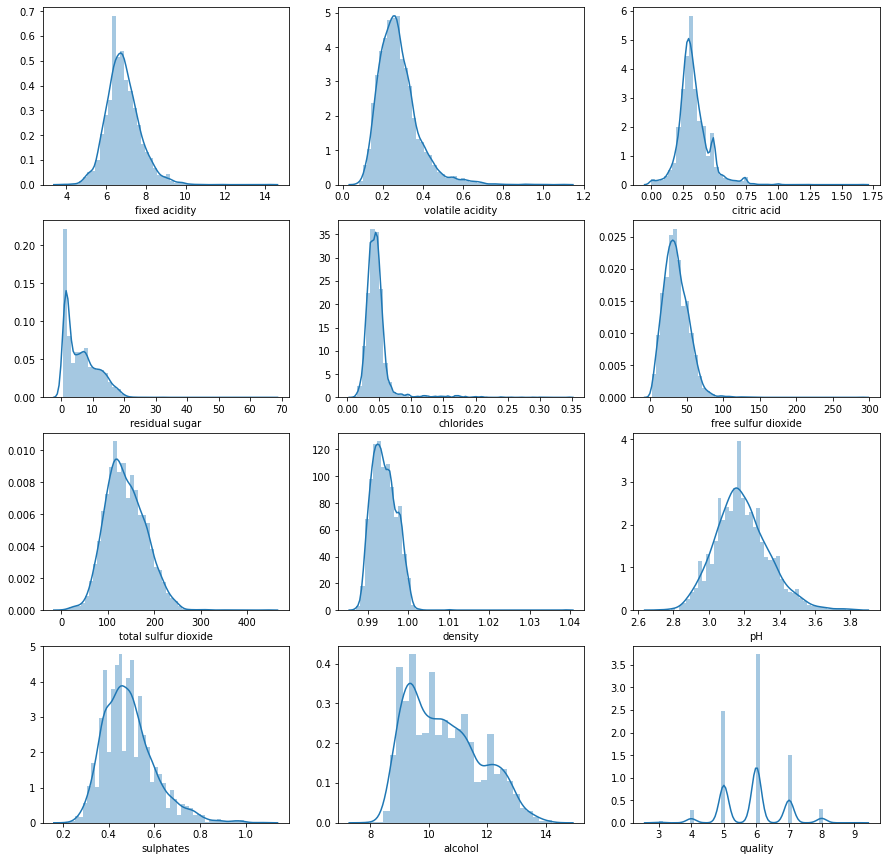

In [12]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(wine.columns):  
    if i<12:
      ax = fig.add_subplot(4, 3, i+1)
      sns.distplot(wine[col])

Most of the features have nearly normal or slightly right skewed distribution

# Correlation Heatmap

Let's look at a heatmap of the correlation between all the features:

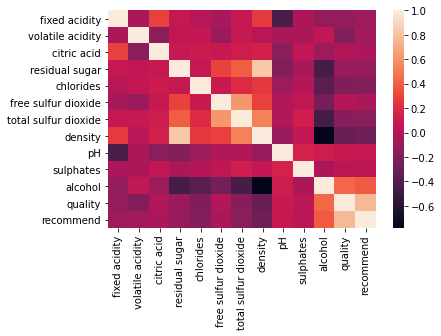

In [13]:
sns.heatmap(wine.corr())

In [14]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,-0.080748
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,-0.067225
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,-0.035330
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,-0.117085
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,-0.183118
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.023413
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,-0.162202
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,-0.283871
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,0.093510
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.047410


We can observe high correlation between some features like:


*   density & residual sugar : 0.84
*   quality & recommend : 0.77
*   alcohol & density : -0.78



# Test-Train split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

#Transformation

Since most of our features are nearly normal or only slightly skewed, transforming them to normal distributions is not very import. Still, let's transform them.

In [0]:
X_train, X_test = transform(X_train, X_test)

#Feature Scaling
Since features are on different scales, we need to scale them

In [0]:
X_train, X_test = scale(X_train, X_test)

In [18]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,-0.010527,0.008426,0.031764,-0.052578,-0.065860,-0.041176,0.039826,-0.017576,0.026720,-0.038567,-0.027767,-0.163408
std,0.836775,0.766494,0.957602,0.518039,0.853555,0.731063,0.733463,0.645781,0.731978,0.745486,0.579954,0.872084
min,-4.092894,-2.502271,-3.619911,-0.972063,-3.299751,-2.204973,-2.916990,-1.666667,-2.852167,-2.592217,-1.640223,-3.221390
25%,-0.521237,-0.510516,-0.439857,-0.596145,-0.552510,-0.522453,-0.449482,-0.500000,-0.473455,-0.547056,-0.559454,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.478763,0.489484,0.560143,0.403855,0.447490,0.477547,0.550518,0.500000,0.526545,0.452944,0.440546,0.000000
max,4.669330,2.447542,5.449408,1.697395,2.430348,5.457558,4.182571,6.166667,2.476996,2.204646,1.277509,2.709451


Now, all features are on a similiar scale

#Model: Random Forest Classifier

In [19]:
model(X_train, X_test, y_train, y_test)

Train accuracy:  1.0
Test accuracy:  1.0
Confusion matrix:
 [[1132    0]
 [   0  338]]


Evaluating model:

We have a perfect accuracy score in both train and test set, i.e our model predicted each case correctly in both seen and unseen data

But, this might be due to high correlation between quality and recommend

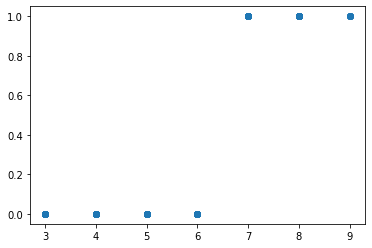

In [20]:
plt.scatter(wine.quality, wine.recommend)

In [21]:
wine[wine.recommend==1].quality.unique()

array([7, 8, 9])

All the points having recommend as True have quality as 7, 8 or 9

In [22]:
wine[wine.recommend==0].quality.unique()

array([6, 5, 4, 3])

All the points having recommend as False have quality as 6, 5, 4 or 3

As suspected, recommend can be predicted from quality alone! Which makes sense since one would only recommend high quality wine

But, what if we had to predict without using the quality column?
#Model without 'quality' column

In [0]:
X_train.drop('quality', axis = 1, inplace = True)
X_test.drop('quality',axis = 1, inplace = True)

In [25]:
model(X_train, X_test, y_train, y_test)

Train accuracy:  1.0
Test accuracy:  0.8802721088435375
Confusion matrix:
 [[1090   42]
 [ 134  204]]


As expected, without the quality, it is much more difficult to predict the recommend value!